In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
dataset=pd.read_csv("Mall_Customers.csv")

In [5]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
x=dataset.iloc[:,[3,4]].values

In [7]:
import scipy.cluster.hierarchy as sch

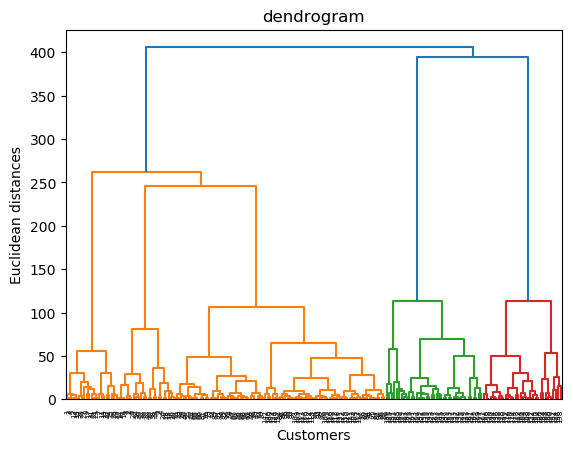

In [8]:
dendrogram=sch.dendrogram(sch.linkage(x,method="ward"))
plt.title('dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [9]:
from sklearn.cluster import OPTICS
clusmodel = OPTICS(min_samples=2)
label=clusmodel.fit_predict(x)

E:\anacoda3\envs\hopeai\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [10]:
supervised=pd.DataFrame(dataset)
supervised['cluster_group']=label
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,35
3,4,Female,23,16,77,29
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,57
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,57
198,199,Male,32,137,18,-1


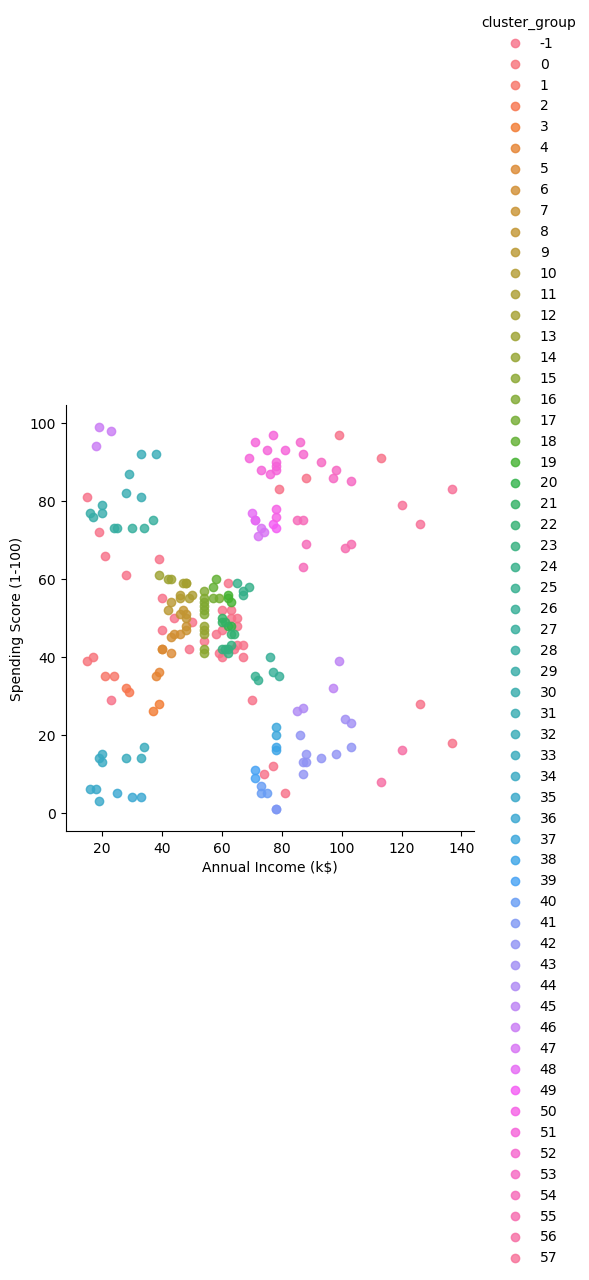

In [11]:
import seaborn as sns
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],fit_reg=False)